In [2]:
import math as m
from matplotlib import pyplot as plt

inputed data

In [12]:
try:
    f = open("elcentro_sec_g.txt", 'r')   
    ddy = []
    time = []
        
    for line in f:
        string = line
        time.append(float(string[:-1].split()[0]))
        ddy.append(float(string[:-1].split()[1]))
finally:
    f.close()
    

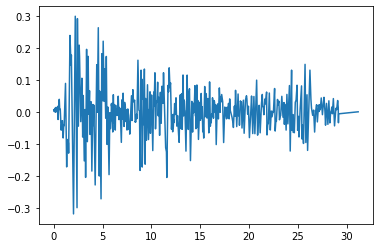

In [3]:
plt.plot(time, ddy)

Step function

In [24]:
time = []
ddy = []
freq = m.pi    #angular frequency of the sin wave in rad/sec

for i in range(0, 500):
    time.append(0.1*i)
    if i<50:
        ddy.append(1)
        #ddy.append(m.sin(freq*0.1*i))
    else:
        ddy.append(0)

In [13]:
def F(T, t, w):
    a = 0
    for i in range(len(time)):
        if time[i] == T:
            a = i
            break
            
    fun = ddy[a]*m.exp(-1*E*w*(t-T))*m.sin(((1-E*E)**0.5)*w*(t-T))/(((1-E*E)**0.5)*w)
    return fun

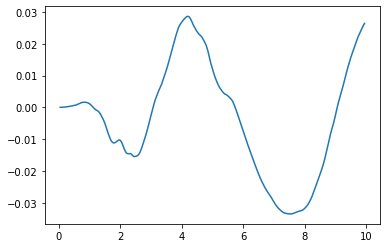

In [16]:
z_max_dept_on_w = []
Wn = []
dT = 0.02
E = 0   #damping coffecient = c/2(km)^0.5

t_list = []
for i in range(1, 200):
    t_list.append(i*0.05)

for j in range(10, 11):
    if j == 0:
        w = 0.05
    else:
        w = 0.1*j
    #w = j    
        
    z_dependent_on_w = []
    Max = 0
    for t in t_list:
        Sum = 0
        k = 0 
        F_prev = F(0, t, w)
        while (dT*k < t):
            F_next = F((k+1)*dT, t, w)
            Sum += dT*(F_prev + F_next)/2
            F_prev = F_next
            k += 1
        z_dependent_on_w.append(Sum)
        if Sum < 0:
            Sum *= -1
        if Sum > Max:
            Max = Sum    
    z_max_dept_on_w.append(Max)
    Wn.append(w)
    plt.plot(t_list, z_dependent_on_w)
    #print(j)
    
#plt.plot(Wn, z_max_dept_on_w)

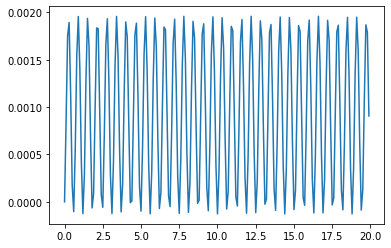

In [29]:
z_max_dept_on_w = []
Wn = []
dT = 0.02
E = 0   #damping coffecient = c/2(km)^0.5

for j in range(10, 11):
    #if j == 0:
    #    w = 0.05
    #else:
    #    w = 0.1*j
    w = j    
        
    z_dependent_on_w = []
    Max = 0
    Sum = 0
    my_x = 0
    F_prev = F(0, 0, w) #=0
    for t in time:
        F_next = F(0, t, w)
        Sum += dT*(F_prev + F_next)/2
        F_prev = F_prev
        my_x = Sum
        z_dependent_on_w.append(my_x)
        if my_x < 0:
            my_x *= -1
        if my_x > Max:
            Max = my_x 
    z_max_dept_on_w.append(Max)
    Wn.append(w)
    plt.plot(time[0:200], z_dependent_on_w[0:200])
    #print(j)
    
#plt.plot(Wn, z_max_dept_on_w)